# Raw_ECG_and_Absolute_EEG_%Evolution

### Importing libraries

In [1]:
import pandas as pd

from my_defs import (create_datasets, discriminate_target_association,
                     encoding_one_hot, normalize, predict, generate_samples, explore_dataset)

### Dataset exploration

In [2]:
data = pd.read_excel("ECG + EEG.xlsx", "ECG_brut_EEG_absolu_%Evolution")
data

,Sujet,Age,Age category,Gender,Scenario,ID scenario Event,ID Event,Event,ID NDRT,NDRT,NDRT duration (s),NDRT duration,NDRT solicitation hands,NDRT solicitation gaze,Lane changing,TOT (s),TTC (s),Brake force (daN),Braking,Standard deviation \nsteering wheel \nrotation speed (° / s),Steering wheel rotation speed,Max Absolute Value Lateral Shift,ILC,Collision,Checking mirrors,"TOQ (Coll a/oTTC < 1,5s)",TOQ (Coll a/o braking),TOQ (Coll a/o steering),TOQ (Coll a/o mirrors),TOQ (Coll a/o(TTC<1s & braking),TOQ (Coll a/o(TTC<1s & steering),TOQ (Coll a/o(TTC<1s & mirror),TOQ (Coll a/o ILC),RRHRVMedian,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
0,01DJ,25.0,0,0,0,3,1,Travaux_2,1,Manger,161,0,1,0,1,3.05014,1.6497,0.000000,0,5.454692,1,3.103440,1,0,1,1,0,1,1,0,1,1,0,28.008163,-14.416433,16.844328,1.929558,14.993954,43.442600,9.184766,36.364218,14.992887,-1.169821,16.427885,16.838121,-17.469994,-34.363114,3.401856,3.376158,-0.206644,-0.100385,0.283664,-0.268141,1.558302,0.103093,1.996370,7.794562,18.408275,14.951140,12.477970,14.849009,14.835787,14.945440,17.319848,14.625850,18.166238,23.885199,10.366859,6.490739,5.159705,5.512821,5.835933,5.505762,7.692308,4.906453,8.398197,17.471156,-4.153411,-3.223034,-2.414001,-4.933018,-4.064272,-5.644907,-5.581236,-5.602962,-5.552645,-2.410371,2.067797,1.415954,-3.982169,-3.006106,-3.882444,-2.004736,0.793383,-1.891673,1.540041,6.934172,10.015261,7.917297,8.043354,-0.116673
1,01DJ,25.0,0,0,0,5,4,Abs. Marquage,2,Lecture,351,1,1,2,0,2.65012,NaN,0.000000,0,4.167806,1,0.264597,0,0,0,1,0,1,0,0,1,0,1,7.704897,-3.588638,3.722842,17.182004,7.410514,16.871600,-7.633984,-9.090909,7.399298,19.667118,-10.219342,-21.678495,22.492010,45.249320,-4.220484,-3.226770,-2.654586,-2.091350,-1.735358,-2.413273,-3.994268,-2.096220,-4.609800,-5.196375,10.196327,7.280130,9.270356,12.733218,11.929030,13.016368,12.494732,13.525410,12.210797,8.799810,3.606760,3.278151,5.107055,3.956044,4.899982,3.402232,3.060814,4.448263,2.621876,3.861549,-7.175680,-4.899012,-6.185878,-6.682427,-6.553245,-6.843267,-6.865263,-6.472388,-7.036843,-7.818513,-8.593220,-8.033086,-6.760773,-5.918271,-5.893271,-5.887924,-8.423363,-5.998383,-9.206023,-9.781805,1.983976,4.135149,3.023388,1.079134
2,01DJ,25.0,0,0,0,6,5,Météo,3,Conversation,224,0,0,0,0,8.00000,NaN,0.000000,0,2.861475,1,0.065688,0,0,0,1,0,1,0,0,1,0,1,50.763054,-9.367556,10.336290,68.854847,15.956549,58.273400,62.032813,118.181818,15.954316,79.405208,-35.431719,-4.396783,4.561778,1.587780,0.836820,-1.673140,-1.303449,-0.836540,-0.533956,-1.089325,-0.698549,-1.632302,-0.435572,4.269889,15.410597,10.114007,12.160733,14.772072,13.967535,15.101325,15.044248,13.665466,15.531277,18.643264,7.687552,5.769546,5.545806,4.597070,6.019453,3.804646,4.269029,2.882780,4.608767,13.586061,-5.178508,-4.440625,-2.685576,-4.223798,-2.252678,-5.124566,-7.104948,-6.762196,-7.246377,-4.111809,-0.203390,-5.635777,-6.537890,-4.289964,-5.150812,-3.677979,-1.266036,-4.155214,-0.410678,4.955621,7.8405

In [3]:
for col in data.columns:
    mode = data[col].mode()[0]
    data[col].fillna(mode, inplace=True)

In [4]:
explore_dataset(data)

DESCRIPTION


,Age,Age category,Gender,Scenario,ID scenario Event,ID Event,ID NDRT,NDRT duration (s),NDRT duration,NDRT solicitation hands,NDRT solicitation gaze,Lane changing,TOT (s),Brake force (daN),Braking,Standard deviation \nsteering wheel \nrotation speed (° / s),Steering wheel rotation speed,Max Absolute Value Lateral Shift,ILC,Collision,Checking mirrors,"TOQ (Coll a/oTTC < 1,5s)",TOQ (Coll a/o braking),TOQ (Coll a/o steering),TOQ (Coll a/o mirrors),TOQ (Coll a/o(TTC<1s & braking),TOQ (Coll a/o(TTC<1s & steering),TOQ (Coll a/o(TTC<1s & mirror),TOQ (Coll a/o ILC),RRHRVMedian,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,42.471758,0.697406,0.475504,0.481268,3.452450,2.659942,3.475504,414.870317,0.818444,0.340058,0.677233,0.729107,2.843208,17.195957,0.368876,8.575853,0.772334,2.087671,0.674352,0.069164,0.619597,0.795389,0.342939,0.729107,0.590778,0.293948,0.628242,0.487032,0.291066,25.252633,-0.694022,3.620058,43.092912,64.759576,1014.384284,14.858961,9.674275,64.751296,39.152466,18.020731,10.525321,1.555953,21.823998,-2.649876,-3.074894,-4.073050,-5.718306,-5.353832,274.318201,-4.212020,-4.599022,-4.091212,1.309617,4.409278,3.762623,4.395339,3.500514,3.430794,3.492091,3.609866,4.948204,3.320350,6.094334,-0.567396,-0.077470,-0.353954,-3.219623,-2.858049,-3.338848,-1.539495,-1.414308,-1.695434,1.994144,-6.692045,292.303713,-7.001120,-9.540201,-8.596433,-10.032624,-8.591099,-8.797625,-8.608427,-3.381492,-3.611611,-4.640886,-6.266182,-7.862148,-7.681610,-7.940016,-5.491334,-6.860080,-5.043251,1.113501,31.802134,2.813648,2.037469,1.143849
std,16.419670,0.810387,0.500121,0.500371,1.700022,1.487786,1.703907,325.140517,0.800220,0.474412,0.752357,0.565215,1.487625,29.293693,0.483197,7.488242,0.419931,1.388655,0.469293,0.254100,0.486187,0.404000,0.475377,0.445063,0.492400,0.456226,0.483972,0.500554,0.454910,86.987722,17.554160,17.088843,141.798006,275.891307,2829.959527,8

****************************************************************************************************
INFORMATIONS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Columns: 101 entries, Sujet to FRONTAL THETA/BETA
dtypes: float64(73), int64(24), object(4)
memory usage: 273.9+ KB


None

****************************************************************************************************
PRESENCE OF NULL VALUE(S)?


Sujet                                                           0
Age                                                             0
Age category                                                    0
Gender                                                          0
Scenario                                                        0
ID scenario Event                                               0
ID Event                                                        0
Event                                                           0
ID NDRT                                                         0
NDRT                                                            0
NDRT duration (s)                                               0
NDRT duration                                                   0
NDRT solicitation hands                                         0
NDRT solicitation gaze                                          0
Lane changing                                                   0
TOT (s)   

****************************************************************************************************
PRESENCE OF DUPLICATED SAMPLE(S)?


0

****************************************************************************************************


### Data Processing (data cleaning and restructuring)

In [5]:
df = data.copy()

>**We can see that the variables that we can judge as categorical are not all in the 'object' format, which could cause us problems later.**
>
> **To start, we will convert the categorical variables to 'object'**

In [6]:
var_to_object = ['Gender',
                 'ID Event',
                 'ID NDRT',
                 'NDRT duration (s)',
                 'NDRT solicitation hands',
                 'NDRT solicitation gaze',
                 'Lane changing']

In [7]:
df[var_to_object]= df[var_to_object].astype('object')

> **We are going to normalize the continuous variables**

In [8]:
df_normalized = normalize(df, normalization_type='minmax')
df_normalized

,Sujet,Age,Age category,Gender,Scenario,ID scenario Event,ID Event,Event,ID NDRT,NDRT,NDRT duration (s),NDRT duration,NDRT solicitation hands,NDRT solicitation gaze,Lane changing,TOT (s),TTC (s),Brake force (daN),Braking,Standard deviation \nsteering wheel \nrotation speed (° / s),Steering wheel rotation speed,Max Absolute Value Lateral Shift,ILC,Collision,Checking mirrors,"TOQ (Coll a/oTTC < 1,5s)",TOQ (Coll a/o braking),TOQ (Coll a/o steering),TOQ (Coll a/o mirrors),TOQ (Coll a/o(TTC<1s & braking),TOQ (Coll a/o(TTC<1s & steering),TOQ (Coll a/o(TTC<1s & mirror),TOQ (Coll a/o ILC),RRHRVMedian,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
0,01DJ,0.028571,0.0,0,0.0,0.4,1,Travaux_2,1,Manger,161,0.0,1,0,1,0.282625,1.6497,0.000000,0.0,0.073754,1.0,0.648685,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.207642,0.149728,0.671217,0.042044,0.021396,0.007237,0.097864,0.196134,0.021399,0.054700,0.162314,0.078575,0.192713,0.123064,0.499361,0.372665,0.345839,0.379519,0.384554,0.000436,0.405289,0.385308,0.404423,0.328758,0.452341,0.435633,0.412396,0.495187,0.492415,0.497811,0.495096,0.497006,0.495537,0.421995,0.374814,0.332605,0.443855,0.398419,0.401227,0.397677,0.411576,0.407760,0.411824,0.360461,0.300746,0.000453,0.296828,0.327670,0.321908,0.330491,0.326514,0.437941,0.323746,0.276821,0.616780,0.455038,0.561985,0.613222,0.605206,0.620385,0.635813,0.628560,0.637288,0.633112,0.006999,0.337030,0.380409,0.503646
1,01DJ,0.028571,0.0,0,0.0,0.8,4,Abs. Marquage,2,Lecture,351,0.5,1,2,0,0.224651,/,0.000000,0.0,0.055795,1.0,0.047690,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.170301,0.241363,0.529537,0.049402,0.019820,0.005897,0.079739,0.127230,0.019821,0.068386,0.106605,0.040103,0.404559,0.321468,0.454692,0.312730,0.325490,0.361886,0.366722,0.000414,0.355550,0.366026,0.346220,0.248948,0.401231,0.386123,0.391356,0.479606,0.471981,0.483548,0.461952,0.489248,0.455105,0.344314,0.335541,0.313997,0.443599,0.387967,0.395124,0.383266,0.380918,0.404690,0.373805,0.295553,0.283535,0.000437,0.275271,0.316177,0.306100,0.322440,0.318325,0.433553,0.314432,0.250839,0.577443,0.406493,0.550326,0.600903,0.596502,0.604216,0.600586,0.611843,0.597030,0.580813,0.006194,0.317385,0.352715,0.525852
2,01DJ,0.028571,0.0,0,0.0,1.0,5,Météo,3,Conversation,224,0.0,0,0,0,1.000000,/,0.000000,0.0,0.037565,1.0,0.005580,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.249491,0.192456,0.600946,0.074332,0.021596,0.007986,0.154817,0.320158,0.021599,0.107621,0.053896,0.057365,0.309508,0.212658,0.484329,0.326832,0.336721,0.372999,0.377333,0.000427,0.385072,0.370093,0.382997,0.307104,0.433684,0.404413,0.410315,0.494621,0.486311,0.498964,0.479465,0.490235,0.477648,0.395002,0.359248,0.328427,0.445732,0.392270,0.402424,0.386023,0.388916,0.394199,0.386882,0.341932,0.294908,0.000442,0.295276,0.332330,0.333415,0.333987,0.316797,0.432090,0.313117,0.268647,0.608400,0.418809,0.551261,0.607791,0.599716,0.613418,0.627942,0.619346,0.629980,0.626922,0.006781,0.333625,0.372542,0.517038
3,01D

### Dataset creation

>**We will start by separating the features from the targets**

In [9]:
X_lane, y_lane, X_no_lane, y_no_lane, X_TOT, y_TOT = create_datasets(df_normalized, only_physio_datas=False)

### Reduction of dimensions according to the link of each figure with the targets.

**The objective here will be to measure the association of each feature with each target to exclude variables that have no impact with the targets.**

In [10]:
X_lane_reduced, lane_pvalues = discriminate_target_association(X_lane,y_lane)

In [11]:
lane_pvalues

,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,RRHRVMedian,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,RRHRVMedian,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
shapiro,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TOQ (Coll a/o(TTC<1s & braking),0.01,0.152,0.064,0.017,0.115,0.415,0.247,0.161,0.37,0.682,0.282,0.291,0.027,0.862,0.501,0.289,0.269,0.727,0.541,0.083,0.672,0.869,0.821,0.948,0.825,0.938,0.527,0.933,0.834,0.737,0.377,0.505,0.908,0.566,0.327,0.299,0.353,0.641,0.496,0.693,0.965,0.683,0.557,0.35,0.735,0.863,0.676,0.755,0.964,0.693,0.516,0.989,0.37,0.611,0.967,0.782,0.788,0.931,0.949,0.892,0.863,0.073,0.288,0.149,0.146,0.129,0.164,0.078,0.148,0.063,0.044,0.917,0.945,0.895,0.83,0.01,0.152,0.064,0.017,0.115,0.415,0.247,0.161,0.37,0.682,0.282,0.291,0.027,0.862,0.501,0.289,0.269,0.727,0.541,0.083,0.672,0.869,0.821,0.948,0.825,0.938,0.527,0.933,0.834,0.737,0.377,0.505,0.908,0.566,0.327,0.299,0.353,0.641,0.496,0.693,0.965,0.683,0.557,0.35,0.735,0.863,0.676,0.755,0.964,0.693,0.516,0.989,0.37,0.611,0.967,0.782,0.788,0.931,0.949,0.892,0.863,0.073,0.288,0.149,0.146,0.129,0.164,0.078,0.148,0.063,0.044,0.917,0.945,0.895,0.83
TOQ (Coll a/o(TTC<1s & steering),0.03,0.931,0.012,0.553,0.001,1.0,0.837,0.185,0.003,0.001,0

In [12]:
for key, value in X_lane_reduced.items():
    print(f"{key}: {value.shape}")

TOQ (Coll a/o(TTC<1s & braking): (211, 4)
TOQ (Coll a/o(TTC<1s & steering): (211, 31)
TOQ (Coll a/o(TTC<1s & mirror): (211, 2)


### TAKE-OVER WITH LANE CHANGING

In [13]:
X_lane_encoded = encoding_one_hot(X_lane_reduced)
list(X_lane_encoded.values())[0]

,Age,PNN50,Oz GAMMA 30-50Hz,ID NDRT_1,ID NDRT_2,ID NDRT_3,ID NDRT_4,ID NDRT_5,ID NDRT_6
0,0.028571,0.007237,0.633112,1,0,0,0,0,0
3,0.028571,0.010376,0.618475,0,0,0,1,0,0
4,0.028571,0.005605,0.594177,0,0,0,0,1,0
5,0.028571,0.007720,0.587871,0,0,0,0,0,1
6,0.028571,0.001608,0.649427,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
337,0.922449,0.000103,0.449669,0,1,0,0,0,0
339,0.922449,0.000102,0.455125,0,0,0,1,0,0
341,0.922449,0.000326,0.450249,0,0,0,0,0,1
342,0.922449,0.166114,0.470045,1,0,0,0,0,0


In [14]:
lane_pvalues

,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,RRHRVMedian,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,RRHRVMedian,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
shapiro,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TOQ (Coll a/o(TTC<1s & braking),0.01,0.152,0.064,0.017,0.115,0.415,0.247,0.161,0.37,0.682,0.282,0.291,0.027,0.862,0.501,0.289,0.269,0.727,0.541,0.083,0.672,0.869,0.821,0.948,0.825,0.938,0.527,0.933,0.834,0.737,0.377,0.505,0.908,0.566,0.327,0.299,0.353,0.641,0.496,0.693,0.965,0.683,0.557,0.35,0.735,0.863,0.676,0.755,0.964,0.693,0.516,0.989,0.37,0.611,0.967,0.782,0.788,0.931,0.949,0.892,0.863,0.073,0.288,0.149,0.146,0.129,0.164,0.078,0.148,0.063,0.044,0.917,0.945,0.895,0.83,0.01,0.152,0.064,0.017,0.115,0.415,0.247,0.161,0.37,0.682,0.282,0.291,0.027,0.862,0.501,0.289,0.269,0.727,0.541,0.083,0.672,0.869,0.821,0.948,0.825,0.938,0.527,0.933,0.834,0.737,0.377,0.505,0.908,0.566,0.327,0.299,0.353,0.641,0.496,0.693,0.965,0.683,0.557,0.35,0.735,0.863,0.676,0.755,0.964,0.693,0.516,0.989,0.37,0.611,0.967,0.782,0.788,0.931,0.949,0.892,0.863,0.073,0.288,0.149,0.146,0.129,0.164,0.078,0.148,0.063,0.044,0.917,0.945,0.895,0.83
TOQ (Coll a/o(TTC<1s & steering),0.03,0.931,0.012,0.553,0.001,1.0,0.837,0.185,0.003,0.001,0

In [15]:
for key in y_lane:
    display(pd.DataFrame(lane_pvalues.T[key].sort_values()[:10]))

,TOQ (Coll a/o(TTC<1s & braking)
Age,0.01
Age,0.01
ID NDRT,0.017
ID NDRT,0.017
PNN50,0.027
PNN50,0.027
Oz GAMMA 30-50Hz,0.044
Oz GAMMA 30-50Hz,0.044
Oz BETA HIGH 17-30Hz,0.063
Oz BETA HIGH 17-30Hz,0.063


,TOQ (Coll a/o(TTC<1s & steering)
RMSSD,0.0
RMSSD,0.0
NDRT duration (s),0.001
NDRT duration (s),0.001
FC,0.001
FC,0.001
FRONTAL THETA,0.002
FRONTAL THETA,0.002
FRONTAL BETA,0.003
MeanRR,0.003


,TOQ (Coll a/o(TTC<1s & mirror)
NDRT duration (s),0.001
NDRT duration (s),0.001
Age,0.008
Age,0.008
ID Event,0.085
ID Event,0.085
FC,0.089
FC,0.089
Gender,0.117
Gender,0.117


TOQ (Coll a/o(TTC<1s & braking)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,33,1
1.0,7,2


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89        34
         1.0       0.67      0.22      0.33         9

    accuracy                           0.81        43
   macro avg       0.75      0.60      0.61        43
weighted avg       0.79      0.81      0.77        43

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,33,1
1.0,9,0


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.79      0.97      0.87        34
         1.0       0.00      0.00      0.00         9

    accuracy                           0.77        43
   macro avg       0.39      0.49      0.43        43
weighted avg       0.62      0.77      0.69        43

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,31,3
1.0,5,4


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.89        34
         1.0       0.57      0.44      0.50         9

    accuracy                           0.81        43
   macro avg       0.72      0.68      0.69        43
weighted avg       0.80      0.81      0.80        43

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,33,1
1.0,9,0


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.79      0.97      0.87        34
         1.0       0.00      0.00      0.00         9

    accuracy                           0.77        43
   macro avg       0.39      0.49      0.43        43
weighted avg       0.62      0.77      0.69        43

************************************



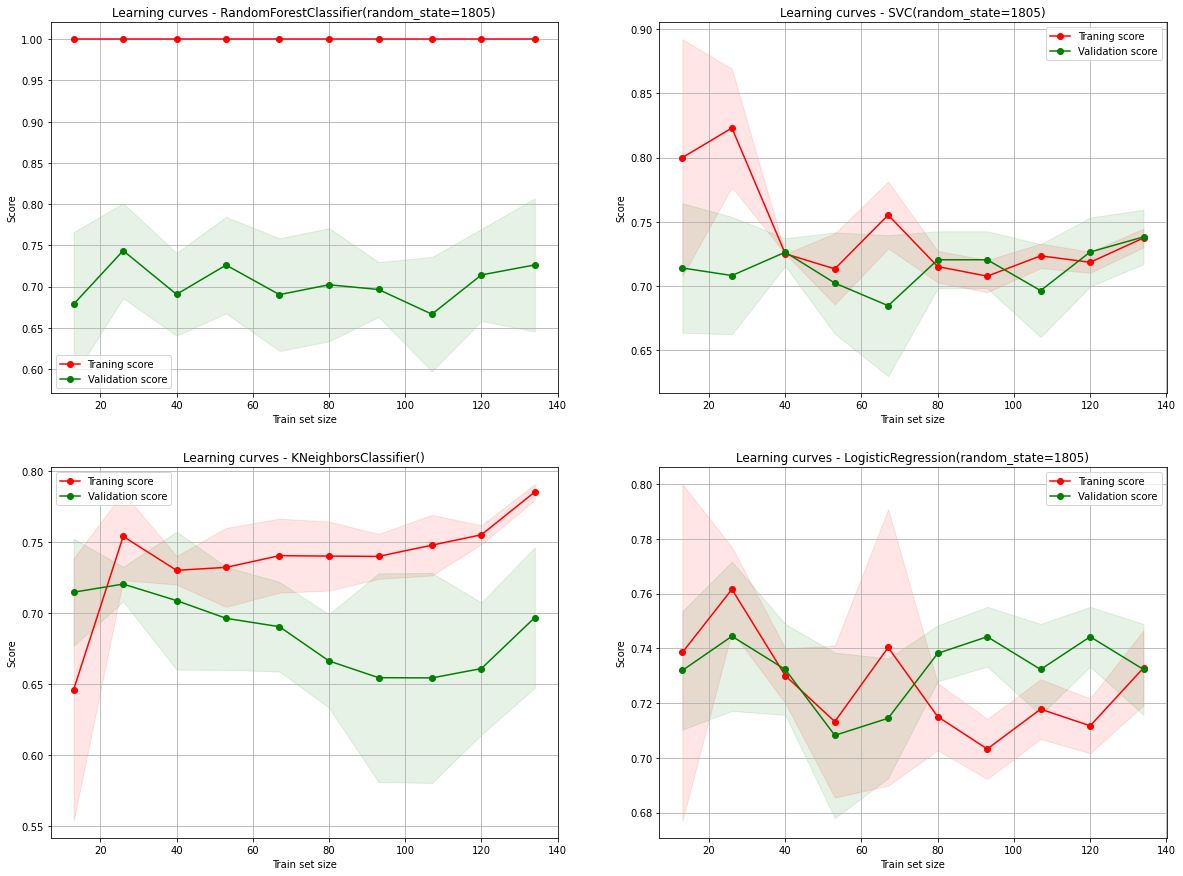

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & braking),Random Forest,"{'max_depth': 10, 'max_features': 'auto', 'n_e...",0.99,0.81,0.33,0.00,Overfitting :0.18,too much complex
1,TOQ (Coll a/o(TTC<1s & braking),SVC,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.74,0.77,0.00,-0.23,Underfitting :-0.04,not complexe enough
2,TOQ (Coll a/o(TTC<1s & braking),KNN Classifier,"{'n_neighbors': 10, 'p': 1, 'weights': 'distan...",1.00,0.81,0.50,0.13,Overfitting :0.19,too much complex
3,TOQ (Coll a/o(TTC<1s & braking),Logistic Regression,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.74,0.77,0.00,-0.23,Underfitting :-0.04,not complexe enough


TOQ (Coll a/o(TTC<1s & steering)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,12,10
1.0,10,11


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.55      0.55      0.55        22
         1.0       0.52      0.52      0.52        21

    accuracy                           0.53        43
   macro avg       0.53      0.53      0.53        43
weighted avg       0.53      0.53      0.53        43

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,12,10
1.0,8,13


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.60      0.55      0.57        22
         1.0       0.57      0.62      0.59        21

    accuracy                           0.58        43
   macro avg       0.58      0.58      0.58        43
weighted avg       0.58      0.58      0.58        43

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,15,7
1.0,9,12


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.62      0.68      0.65        22
         1.0       0.63      0.57      0.60        21

    accuracy                           0.63        43
   macro avg       0.63      0.63      0.63        43
weighted avg       0.63      0.63      0.63        43

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,14,8
1.0,9,12


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.61      0.64      0.62        22
         1.0       0.60      0.57      0.59        21

    accuracy                           0.60        43
   macro avg       0.60      0.60      0.60        43
weighted avg       0.60      0.60      0.60        43

************************************



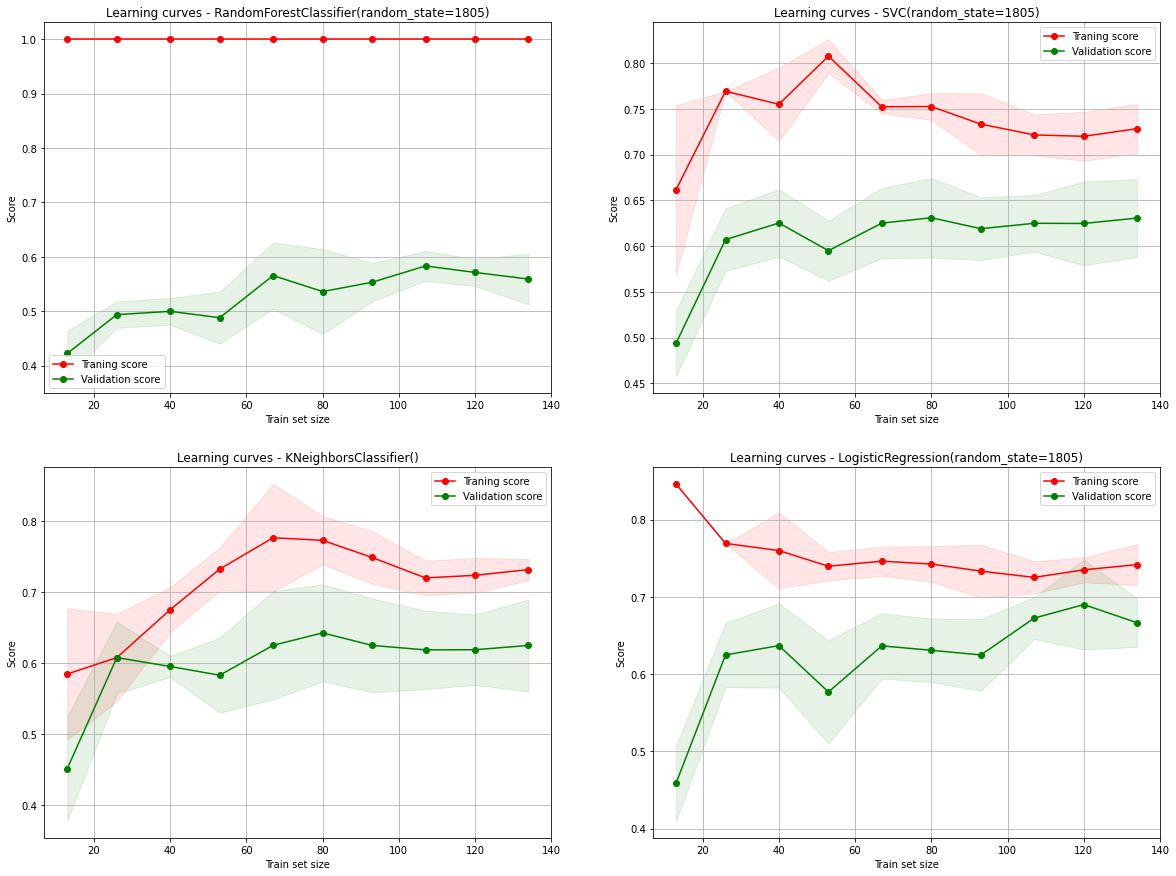

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & steering),Random Forest,"{'max_depth': 10, 'max_features': 'auto', 'n_e...",0.96,0.53,0.52,-0.27,Overfitting :0.45,too much complex
1,TOQ (Coll a/o(TTC<1s & steering),SVC,"{'C': 10, 'gamma': 0.1, 'kernel': 'sigmoid'}",0.71,0.58,0.59,-0.18,Overfitting :0.18,too much complex
2,TOQ (Coll a/o(TTC<1s & steering),KNN Classifier,"{'n_neighbors': 20, 'p': 1, 'weights': 'distan...",1.00,0.63,0.60,-0.09,Overfitting :0.37,too much complex
3,TOQ (Coll a/o(TTC<1s & steering),Logistic Regression,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.73,0.60,0.59,-0.13,Overfitting :0.18,too much complex


TOQ (Coll a/o(TTC<1s & mirror)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,9,12
1.0,7,15


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.56      0.43      0.49        21
         1.0       0.56      0.68      0.61        22

    accuracy                           0.56        43
   macro avg       0.56      0.56      0.55        43
weighted avg       0.56      0.56      0.55        43

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,8,13
1.0,6,16


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.57      0.38      0.46        21
         1.0       0.55      0.73      0.63        22

    accuracy                           0.56        43
   macro avg       0.56      0.55      0.54        43
weighted avg       0.56      0.56      0.54        43

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,9,12
1.0,6,16


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.60      0.43      0.50        21
         1.0       0.57      0.73      0.64        22

    accuracy                           0.58        43
   macro avg       0.59      0.58      0.57        43
weighted avg       0.59      0.58      0.57        43

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,8,13
1.0,6,16


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.57      0.38      0.46        21
         1.0       0.55      0.73      0.63        22

    accuracy                           0.56        43
   macro avg       0.56      0.55      0.54        43
weighted avg       0.56      0.56      0.54        43

************************************



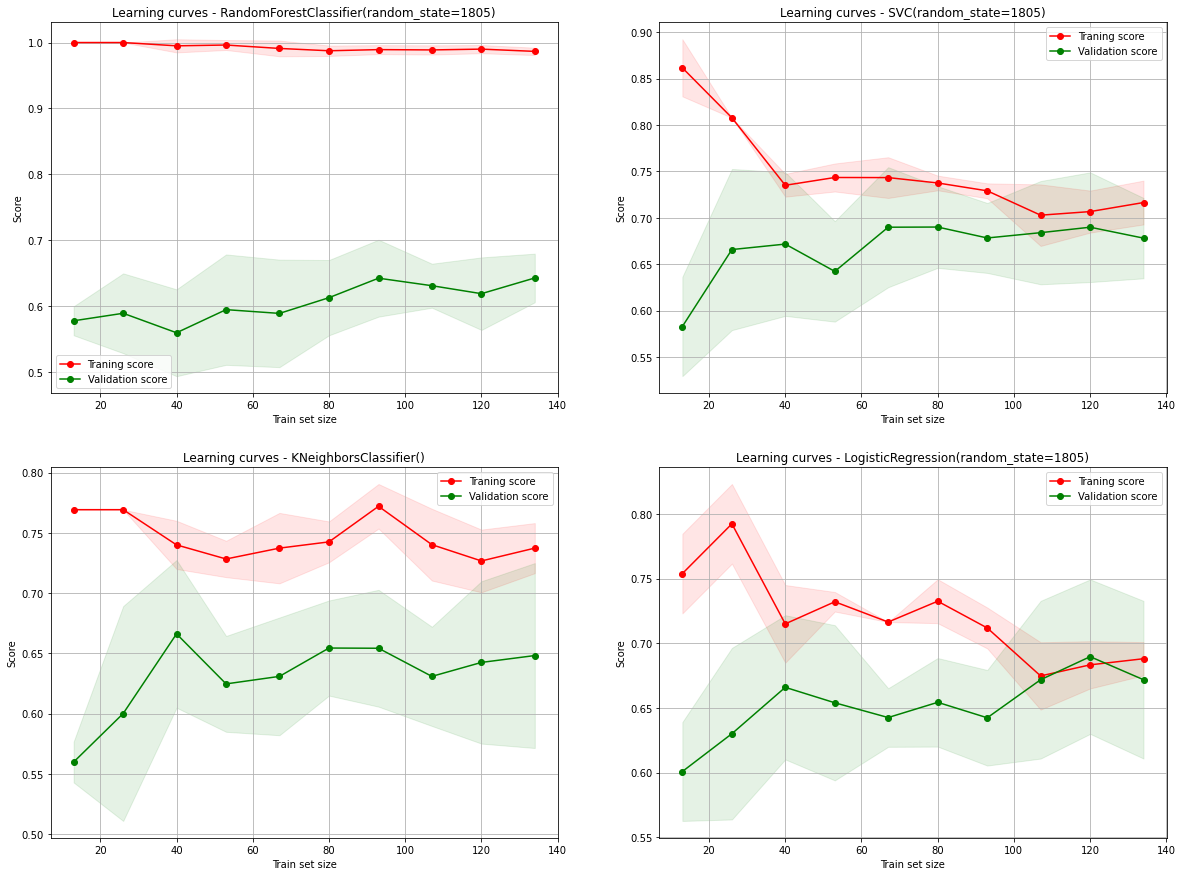

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & mirror),Random Forest,"{'max_depth': 10, 'max_features': 'auto', 'n_e...",0.92,0.56,0.61,-0.24,Overfitting :0.39,too much complex
1,TOQ (Coll a/o(TTC<1s & mirror),SVC,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}",0.70,0.56,0.63,-0.25,Overfitting :0.2,too much complex
2,TOQ (Coll a/o(TTC<1s & mirror),KNN Classifier,"{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}",0.68,0.58,0.64,-0.20,Overfitting :0.15,too much complex
3,TOQ (Coll a/o(TTC<1s & mirror),Logistic Regression,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.68,0.56,0.63,-0.25,Overfitting :0.18,too much complex


In [16]:
predict(X_lane_encoded,y_lane, method = 'classification')

### Resampling dataset (create new samples)

In [17]:
X_lane_resampled, y_lane_resampled = generate_samples(X_lane_encoded,y_lane,n_samples_created=1000)

In [18]:
X_lane_resampled, y_lane_resampled = generate_samples(X_lane_resampled,y_lane_resampled, _sampling_strategy='auto')

TOQ (Coll a/o(TTC<1s & braking)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,189,11
1.0,9,191


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95       200
         1.0       0.95      0.95      0.95       200

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,147,53
1.0,16,184


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.73      0.81       200
         1.0       0.78      0.92      0.84       200

    accuracy                           0.83       400
   macro avg       0.84      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,178,22
1.0,7,193


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.96      0.89      0.92       200
         1.0       0.90      0.96      0.93       200

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,103,97
1.0,46,154


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.69      0.52      0.59       200
         1.0       0.61      0.77      0.68       200

    accuracy                           0.64       400
   macro avg       0.65      0.64      0.64       400
weighted avg       0.65      0.64      0.64       400

************************************



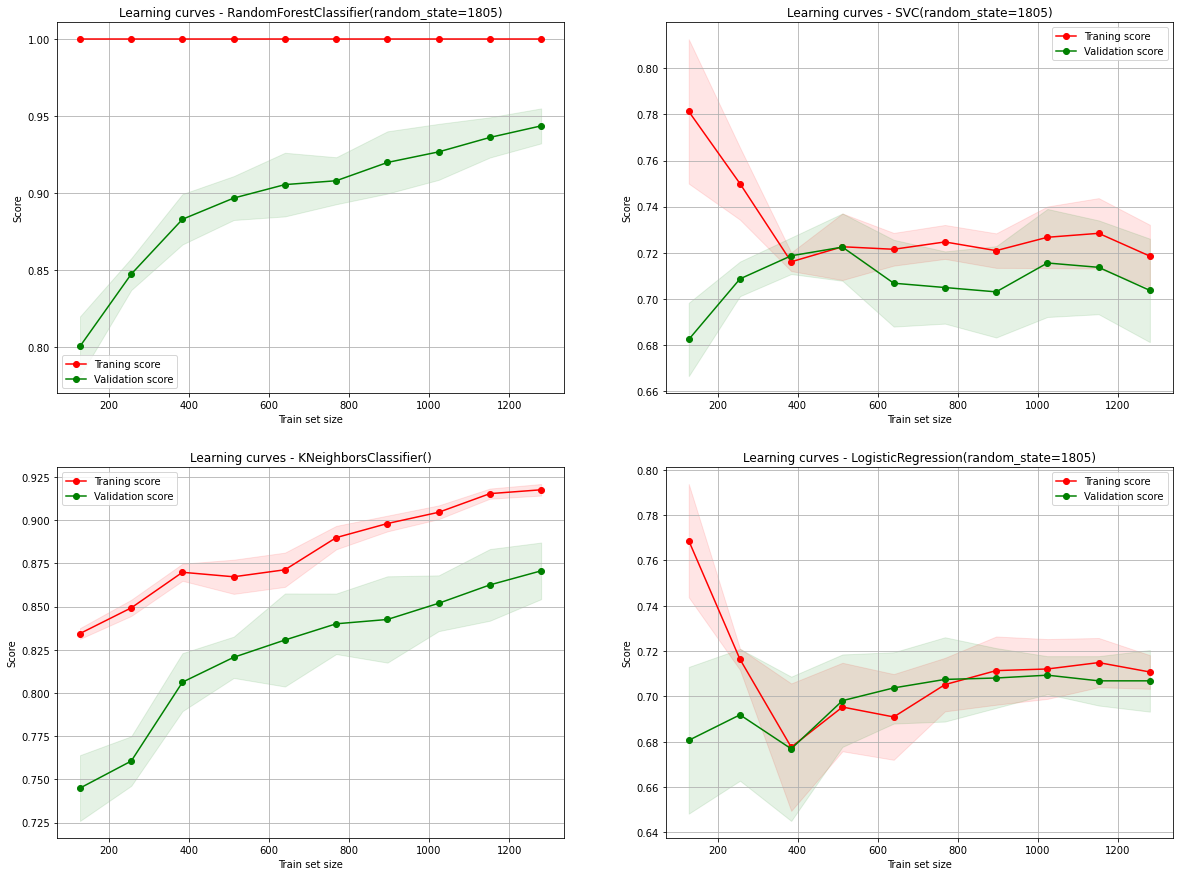

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & braking),Random Forest,"{'max_depth': None, 'max_features': 'auto', 'n...",1.00,0.95,0.95,0.81,Overfitting :0.05,too much complex
1,TOQ (Coll a/o(TTC<1s & braking),SVC,"{'C': 10, 'gamma': 10, 'kernel': 'rbf'}",0.87,0.83,0.84,0.41,Overfitting :0.05,not complexe enough
2,TOQ (Coll a/o(TTC<1s & braking),KNN Classifier,"{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}",1.00,0.93,0.93,0.73,Overfitting :0.07,too much complex
3,TOQ (Coll a/o(TTC<1s & braking),Logistic Regression,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",0.71,0.64,0.68,-0.06,Overfitting :0.1,too much complex


TOQ (Coll a/o(TTC<1s & steering)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,188,12
1.0,8,192


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       200
         1.0       0.94      0.96      0.95       200

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,197,3
1.0,1,199


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       200
         1.0       0.99      0.99      0.99       200

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,194,6
1.0,8,192


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       200
         1.0       0.97      0.96      0.96       200

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,148,52
1.0,47,153


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75       200
         1.0       0.75      0.77      0.76       200

    accuracy                           0.75       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.75      0.75       400

************************************



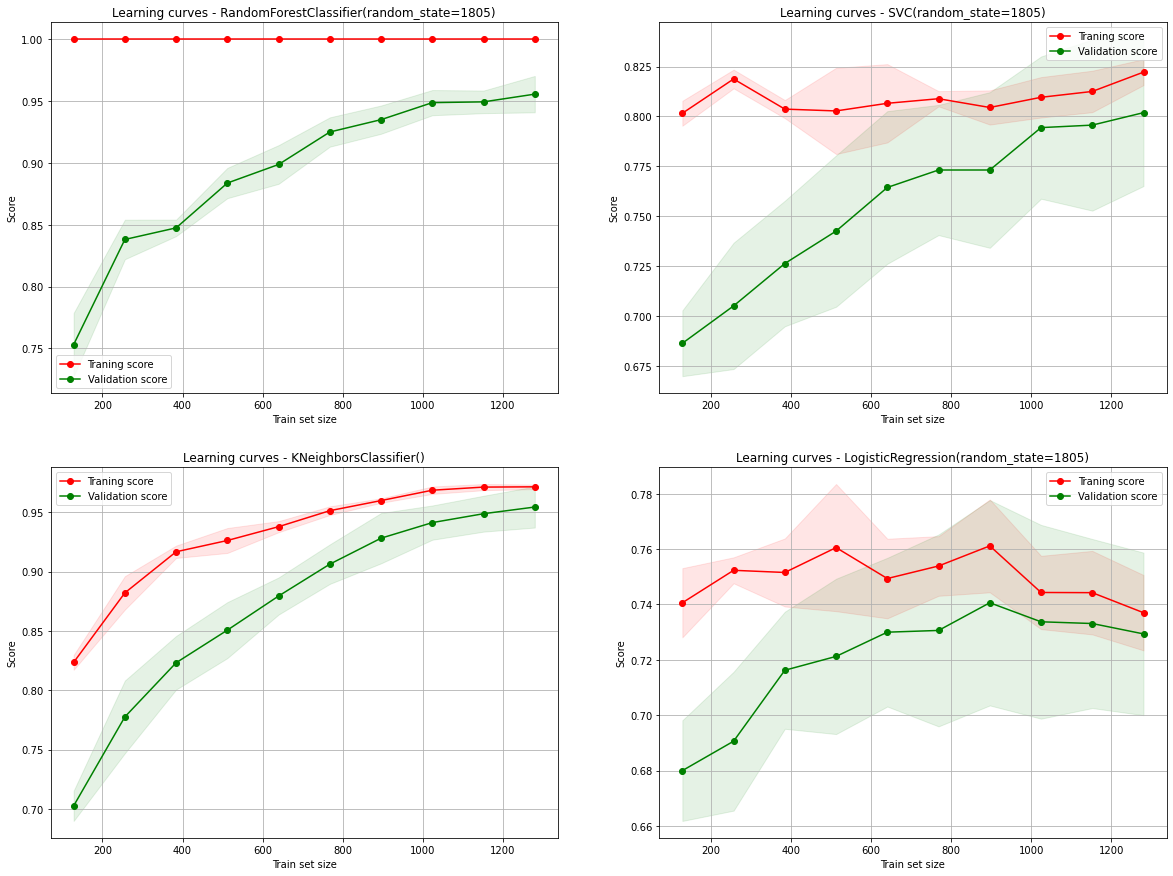

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & steering),Random Forest,"{'max_depth': None, 'max_features': 'auto', 'n...",1.00,0.95,0.95,0.81,Overfitting :0.05,too much complex
1,TOQ (Coll a/o(TTC<1s & steering),SVC,"{'C': 10, 'gamma': 1, 'kernel': 'poly'}",1.00,0.99,0.99,0.96,Overfitting :0.01,not complexe enough
2,TOQ (Coll a/o(TTC<1s & steering),KNN Classifier,"{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}",1.00,0.96,0.96,0.86,Overfitting :0.04,not complexe enough
3,TOQ (Coll a/o(TTC<1s & steering),Logistic Regression,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.78,0.75,0.76,0.21,Overfitting :0.04,not complexe enough


TOQ (Coll a/o(TTC<1s & mirror)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,137,59
1.0,48,156


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.74      0.70      0.72       196
         1.0       0.73      0.76      0.74       204

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.73      0.73      0.73       400

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,139,57
1.0,53,151


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.72      0.71      0.72       196
         1.0       0.73      0.74      0.73       204

    accuracy                           0.73       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.72      0.72      0.72       400

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,139,57
1.0,50,154


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.74      0.71      0.72       196
         1.0       0.73      0.75      0.74       204

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.73      0.73      0.73       400

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,114,82
1.0,51,153


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.69      0.58      0.63       196
         1.0       0.65      0.75      0.70       204

    accuracy                           0.67       400
   macro avg       0.67      0.67      0.66       400
weighted avg       0.67      0.67      0.66       400

************************************



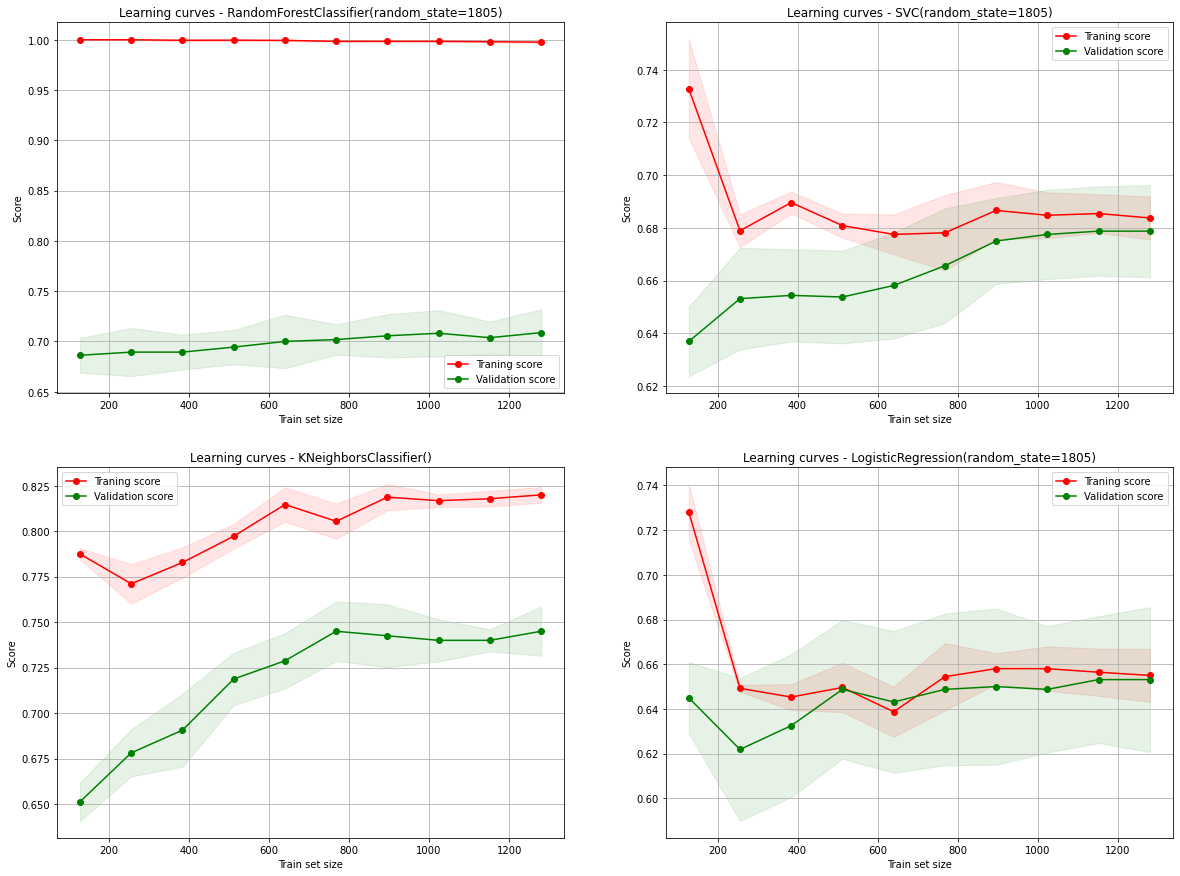

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & mirror),Random Forest,"{'max_depth': 10, 'max_features': 'auto', 'n_e...",0.88,0.73,0.74,0.15,Overfitting :0.17,too much complex
1,TOQ (Coll a/o(TTC<1s & mirror),SVC,"{'C': 10, 'gamma': 10, 'kernel': 'rbf'}",0.73,0.72,0.73,0.14,Overfitting :0.01,not complexe enough
2,TOQ (Coll a/o(TTC<1s & mirror),KNN Classifier,"{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}",0.83,0.73,0.74,0.16,Overfitting :0.12,too much complex
3,TOQ (Coll a/o(TTC<1s & mirror),Logistic Regression,"{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}",0.65,0.67,0.70,-0.00,Underfitting :-0.03,not complexe enough


In [19]:
predict(X_lane_resampled,y_lane_resampled, method = 'classification')

### TAKE-OVER WITHOUT CHANGING LANE

In [20]:
X_no_lane_reduced, no_lane_pvalues = discriminate_target_association(X_no_lane,y_no_lane)

In [21]:
no_lane_pvalues

,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,RRHRVMedian,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,RRHRVMedian,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
shapiro,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.033,0.422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.033,0.422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TOQ (Coll a/o ILC),0.009,0.211,0.392,0.321,0.025,0.505,0.084,0.968,0.277,0.219,0.756,0.304,0.742,0.421,0.13,0.303,0.782,0.82,0.965,0.852,0.292,0.7,0.729,0.864,0.891,0.9,0.76,0.964,0.947,0.711,0.399,0.569,0.741,0.799,0.617,0.681,0.645,0.35,0.403,0.309,0.753,0.968,0.927,0.976,0.983,0.957,0.965,0.655,0.66,0.734,0.921,0.863,0.057,0.924,0.958,0.965,0.986,0.763,0.936,0.783,0.532,0.381,0.55,0.844,0.538,0.631,0.488,0.546,0.589,0.515,0.223,0.706,0.773,0.514,0.203,0.009,0.211,0.392,0.321,0.025,0.505,0.084,0.968,0.277,0.219,0.756,0.304,0.742,0.421,0.13,0.303,0.782,0.82,0.965,0.852,0.292,0.7,0.729,0.864,0.891,0.9,0.76,0.964,0.947,0.711,0.399,0.569,0.741,0.799,0.617,0.681,0.645,0.35,0.403,0.309,0.753,0.968,0.927,0.976,0.983,0.957,0.965,0.655,0.66,0.734,0.921,0.863,0.057,0.924,0.958,0.965,0.986,0.763,0.936,0.783,0.532,0.381,0.55,0.844,0.538,0.631,0.488,0.546,0.589,0.515,0.223,0.706,0.773,0.514,0.203


In [22]:
for key in y_no_lane:
    display(pd.DataFrame(no_lane_pvalues.T[key].sort_values()[:10]))

,TOQ (Coll a/o ILC)
Age,0.009
Age,0.009
NDRT duration (s),0.025
NDRT duration (s),0.025
Pz DELTA 1-4Hz,0.057
Pz DELTA 1-4Hz,0.057
NDRT solicitation gaze,0.084
NDRT solicitation gaze,0.084
TINN,0.13
TINN,0.13


In [23]:
X_no_lane_encoded = encoding_one_hot(X_no_lane_reduced)
list(X_no_lane_encoded.values())[0]

,Age,NDRT duration (s)_224,NDRT duration (s)_322,NDRT duration (s)_351,NDRT duration (s)_1265
1,0.028571,0,0,1,0
2,0.028571,1,0,0,0
8,0.028571,0,1,0,0
9,0.028571,0,0,0,1
15,0.171429,0,0,1,0
16,0.171429,1,0,0,0
17,0.171429,0,1,0,0
18,0.171429,0,0,0,1
24,0.016327,1,0,0,0
25,0.016327,0,0,1,0


In [24]:
for k in X_no_lane_encoded:
    X_no_lane_encoded[k] = X_no_lane_encoded[k].astype(int)

TOQ (Coll a/o  ILC)

Random Forest
************************************
Confusion Matrix


Predicted classe,1.0
Real class,
0.0,7
1.0,16


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         7
         1.0       0.70      1.00      0.82        16

    accuracy                           0.70        23
   macro avg       0.35      0.50      0.41        23
weighted avg       0.48      0.70      0.57        23

************************************

SVC
************************************
Confusion Matrix


Predicted classe,1.0
Real class,
0.0,7
1.0,16


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         7
         1.0       0.70      1.00      0.82        16

    accuracy                           0.70        23
   macro avg       0.35      0.50      0.41        23
weighted avg       0.48      0.70      0.57        23

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,1.0
Real class,
0.0,7
1.0,16


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         7
         1.0       0.70      1.00      0.82        16

    accuracy                           0.70        23
   macro avg       0.35      0.50      0.41        23
weighted avg       0.48      0.70      0.57        23

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,1.0
Real class,
0.0,7
1.0,16


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         7
         1.0       0.70      1.00      0.82        16

    accuracy                           0.70        23
   macro avg       0.35      0.50      0.41        23
weighted avg       0.48      0.70      0.57        23

************************************



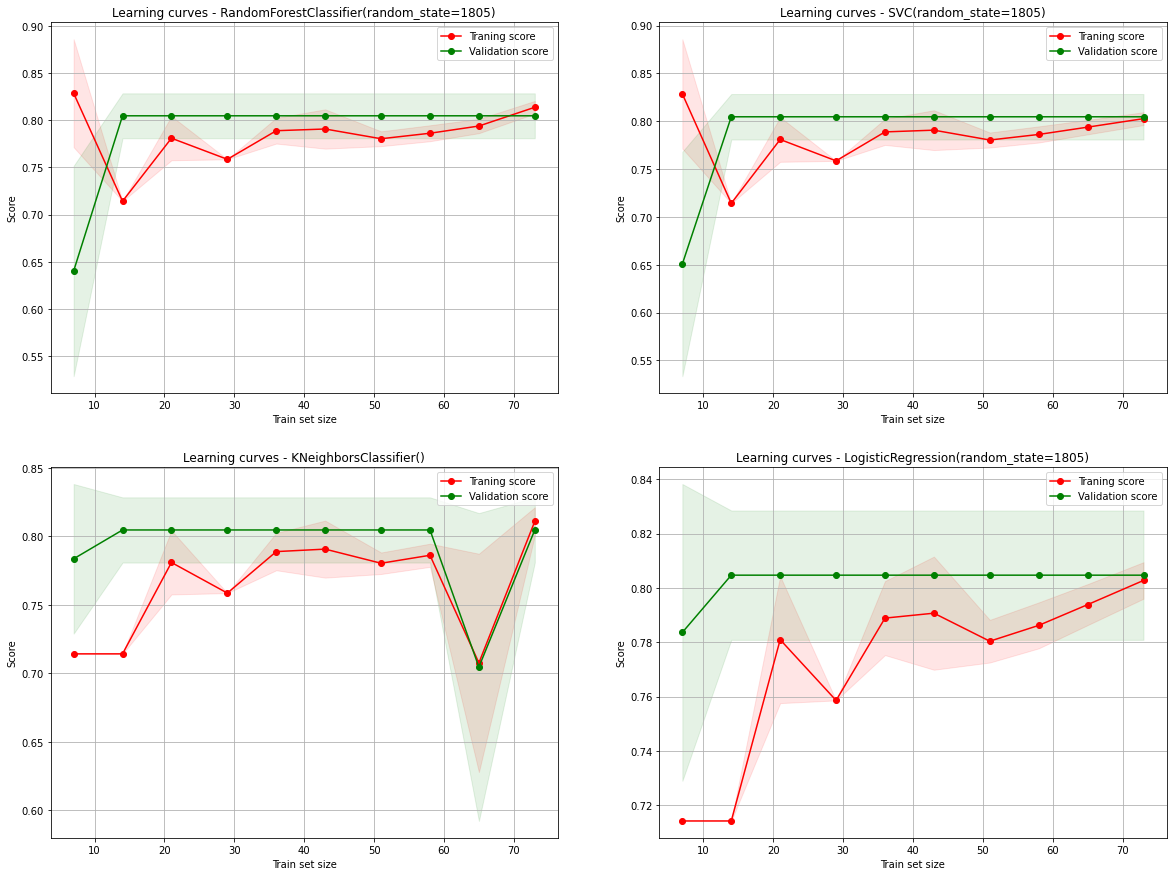

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o ILC),Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.82,0.7,0.82,-0.3,Overfitting :0.15,too much complex
1,TOQ (Coll a/o ILC),SVC,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}",0.80,0.7,0.82,-0.3,Overfitting :0.13,too much complex
2,TOQ (Coll a/o ILC),KNN Classifier,"{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}",0.80,0.7,0.82,-0.3,Overfitting :0.13,too much complex
3,TOQ (Coll a/o ILC),Logistic Regression,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.80,0.7,0.82,-0.3,Overfitting :0.13,too much complex


In [25]:
predict(X_no_lane_encoded,y_no_lane, method = 'classification')

### Resampling dataset (create new samples)

In [26]:
X_no_lane_resampled, y_no_lane_resampled = generate_samples(X_no_lane_encoded,y_no_lane,n_samples_created=200)

In [27]:
X_no_lane_resampled, y_no_lane_resampled = generate_samples(X_no_lane_resampled,y_no_lane_resampled, _sampling_strategy='auto')

In [28]:
X_no_lane_resampled

{'TOQ (Coll a/o  ILC)':      Age  NDRT duration (s)_224  NDRT duration (s)_322  NDRT duration (s)_351  \
 0      0                      0                      0                      1   
 1      0                      1                      0                      0   
 2      0                      0                      1                      0   
 3      0                      0                      0                      0   
 4      0                      0                      0                      1   
 ..   ...                    ...                    ...                    ...   
 395    0                      0                      0                      0   
 396    0                      1                      0                      0   
 397    0                      0                      1                      0   
 398    0                      0                      0                      0   
 399    0                      0                      0                    

TOQ (Coll a/o  ILC)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,34,4
1.0,21,21


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.62      0.89      0.73        38
         1.0       0.84      0.50      0.63        42

    accuracy                           0.69        80
   macro avg       0.73      0.70      0.68        80
weighted avg       0.73      0.69      0.68        80

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,34,4
1.0,21,21


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.62      0.89      0.73        38
         1.0       0.84      0.50      0.63        42

    accuracy                           0.69        80
   macro avg       0.73      0.70      0.68        80
weighted avg       0.73      0.69      0.68        80

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,34,4
1.0,21,21


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.62      0.89      0.73        38
         1.0       0.84      0.50      0.63        42

    accuracy                           0.69        80
   macro avg       0.73      0.70      0.68        80
weighted avg       0.73      0.69      0.68        80

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,34,4
1.0,21,21


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.62      0.89      0.73        38
         1.0       0.84      0.50      0.63        42

    accuracy                           0.69        80
   macro avg       0.73      0.70      0.68        80
weighted avg       0.73      0.69      0.68        80

************************************



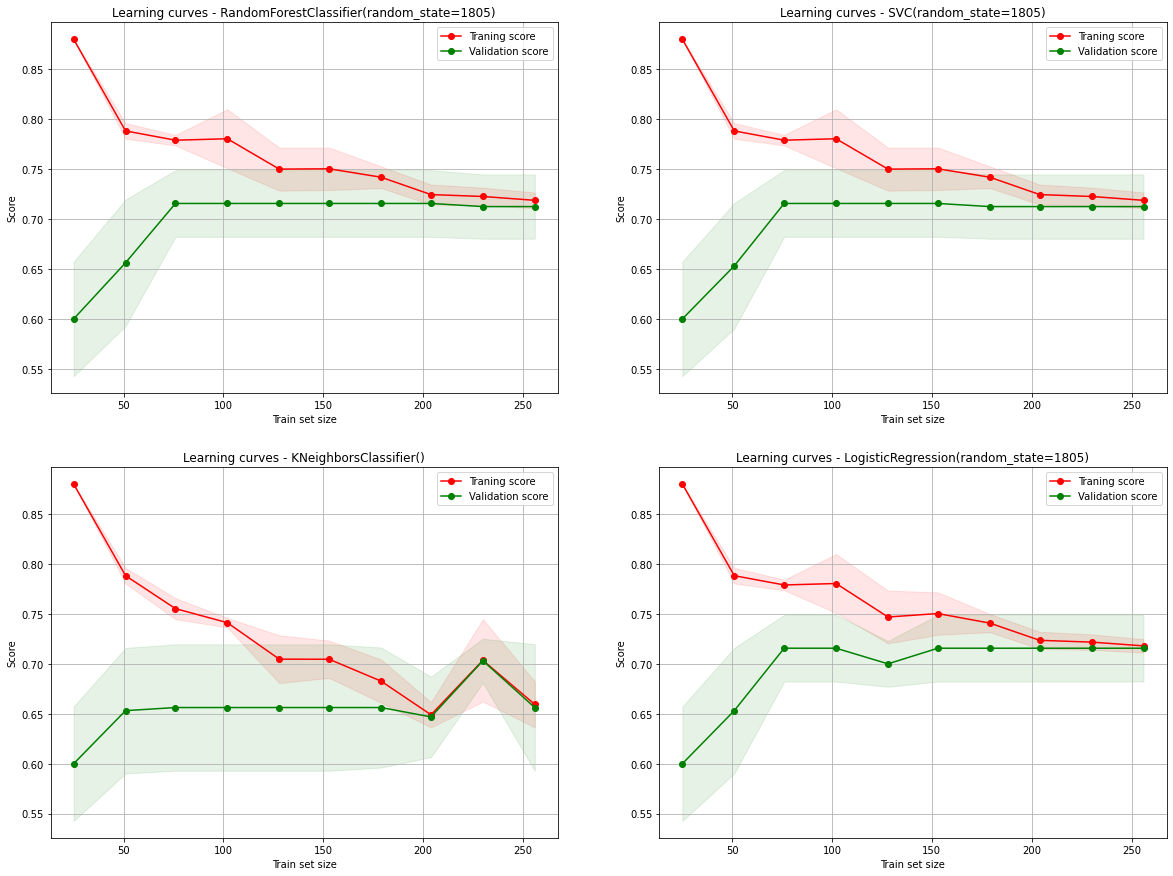

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o ILC),Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.72,0.69,0.63,0.03,Overfitting :0.04,not complexe enough
1,TOQ (Coll a/o ILC),SVC,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}",0.72,0.69,0.63,0.03,Overfitting :0.04,not complexe enough
2,TOQ (Coll a/o ILC),KNN Classifier,"{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}",0.72,0.69,0.63,0.03,Overfitting :0.04,not complexe enough
3,TOQ (Coll a/o ILC),Logistic Regression,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.72,0.69,0.63,0.03,Overfitting :0.04,not complexe enough


In [29]:
predict(X_no_lane_resampled,y_no_lane_resampled, method = 'classification')

### TAKE-OVER TIME

In [30]:
X_TOT_reduced, TOT_pvalues = discriminate_target_association(X_TOT,y_TOT)

In [31]:
X_TOT_encoded = encoding_one_hot(X_TOT_reduced)
list(X_TOT_encoded.values())[0]

,LF,Pz TOTAL BAND 1-50Hz,ID Event_1,ID Event_2,ID Event_3,ID Event_4,ID Event_5,NDRT duration (s)_128,NDRT duration (s)_161,NDRT duration (s)_166,NDRT duration (s)_224,NDRT duration (s)_250,NDRT duration (s)_298,NDRT duration (s)_322,NDRT duration (s)_351,NDRT duration (s)_354,NDRT duration (s)_647,NDRT duration (s)_872,NDRT duration (s)_1265
0,0.192713,0.300746,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.404559,0.283535,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.309508,0.294908,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,0.252099,0.293801,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.292409,0.287762,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,0.335088,0.035174,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
343,0.393256,0.002203,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
344,0.242569,0.025462,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
345,0.415132,0.024728,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [32]:
list(X_TOT_reduced.values())[0]

,LF,Pz TOTAL BAND 1-50Hz,ID Event_1,ID Event_2,ID Event_3,ID Event_4,ID Event_5,NDRT duration (s)_128,NDRT duration (s)_161,NDRT duration (s)_166,NDRT duration (s)_224,NDRT duration (s)_250,NDRT duration (s)_298,NDRT duration (s)_322,NDRT duration (s)_351,NDRT duration (s)_354,NDRT duration (s)_647,NDRT duration (s)_872,NDRT duration (s)_1265
0,0.192713,0.300746,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.404559,0.283535,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.309508,0.294908,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,0.252099,0.293801,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.292409,0.287762,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,0.335088,0.035174,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
343,0.393256,0.002203,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
344,0.242569,0.025462,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
345,0.415132,0.024728,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [33]:
TOT_pvalues

,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,RRHRVMedian,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,RRHRVMedian,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
shapiro,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TOT (s),0.124,0.742,0.048,0.229,0.026,0.106,0.265,0.696,0.736,0.855,0.364,0.598,0.657,0.283,0.491,0.599,0.353,0.359,0.079,0.0,0.118,0.832,0.675,0.835,0.959,0.966,0.952,0.773,0.973,0.989,0.703,0.263,0.171,0.087,0.289,0.241,0.331,0.367,0.289,0.398,0.397,0.596,0.651,0.27,0.381,0.662,0.228,0.757,0.581,0.826,0.653,0.033,0.235,0.283,0.235,0.228,0.225,0.086,0.48,0.063,0.2,0.699,0.77,0.735,0.759,0.763,0.758,0.738,0.772,0.726,0.637,0.272,0.192,0.369,0.473,0.124,0.742,0.048,0.229,0.026,0.106,0.265,0.696,0.736,0.855,0.364,0.598,0.657,0.283,0.491,0.599,0.353,0.359,0.079,0.0,0.118,0.832,0.675,0.835,0.959,0.966,0.952,0.773,0.973,0.989,0.703,0.263,0.171,0.087,0.289,0.241,0.331,0.367,0.289,0.398,0.397,0.596,0.651,0.27,0.381,0.662,0.228,0.757,0.581,0.826,0.653,0.033,0.235,0.283,0.235,0.228,0.225,0.086,0.48,0.063,0.2,0.699,0.77,0.735,0.759,0.763,0.758,0.738,0.772,0.726,0.637,0.272,0.192,0.369,0.473


In [34]:
for key in y_TOT:
    display(pd.DataFrame(TOT_pvalues.T[key].sort_values()[:10]))

,TOT (s)
LF,0.0
LF,0.0
NDRT duration (s),0.026
NDRT duration (s),0.026
Pz TOTAL BAND 1-50Hz,0.033
Pz TOTAL BAND 1-50Hz,0.033
ID Event,0.048
ID Event,0.048
Pz BETA HIGH 17-30Hz,0.063
Pz BETA HIGH 17-30Hz,0.063


TOT (s)



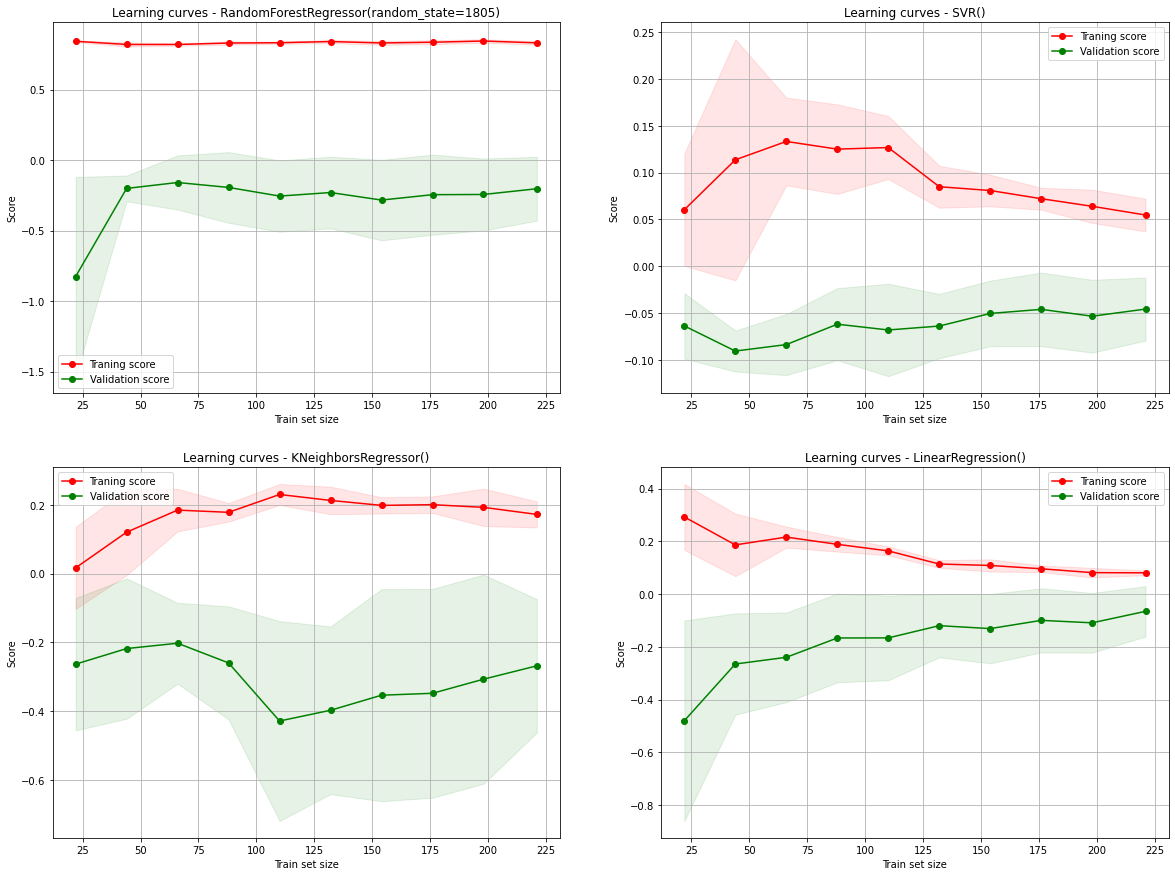

,target,model,hyperparameters,grid_score_train,grid_score_test,mse,mae,rmse,mean_error (s),fitting,complexity
0,TOT (s),Random Forest,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.32,-0.09,0.069,0.155,0.263,0.155,Overfitting :1.28,too much complex
1,TOT (s),SVR,"{'C': 1, 'gamma': 'auto', 'kernel': 'poly'}",-0.00,-0.08,0.069,0.147,0.263,0.147,Underfitting :-inf,too much complex
2,TOT (s),KNN Regressor,"{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}",0.06,-0.10,0.070,0.162,0.265,0.162,Overfitting :2.67,too much complex
3,TOT (s),Linear Regression,{},0.07,-0.09,0.069,0.161,0.263,0.161,Overfitting :2.29,too much complex


In [35]:
predict(X_TOT_encoded,y_TOT, method = 'regression')